# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Jajang Nurjaman
- **Email:** za2ng2509@gmail.com
- **ID Dicoding:** za2ng2509@gmail.com

## Menentukan Pertanyaan Bisnis

- Apa pola penggunaan sepeda berdasarkan waktu dan hari dalam seminggu?
- Bagaimana faktor cuaca mempengaruhi jumlah peminjaman sepeda?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files


## Data Wrangling

### Gathering Data

In [6]:
df_day = pd.read_csv('day.csv')  # Ganti dengan path yang sesuai
df_hour = pd.read_csv('hour.csv')  # Ganti dengan path yang sesuai


In [ ]:
print("Day Dataset:")
print(df_day.head())
print(df_day.info())


Day Dataset:
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
<class 'panda

### Assessing Data

In [ ]:
print("\nHour Dataset:")
print(df_hour.head())
print(df_hour.info())



Hour Dataset:
   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data col

In [ ]:
print("\nHour Dataset:")
print(df_hour.head())
print(df_hour.info())


**Insight:**
Berdasarkan dataset **Day Dataset**, berikut adalah beberapa *insight* yang dapat diidentifikasi untuk memahami faktor-faktor yang mungkin mempengaruhi peminjaman sepeda:

### 1. **Pola Musiman (Seasonality)**
   - Kolom **`season`** merepresentasikan musim (1 = Musim Semi, 2 = Musim Panas, 3 = Musim Gugur, 4 = Musim Dingin). Dengan adanya variasi dalam jumlah peminjaman sepeda di setiap musim, analisis ini dapat mengidentifikasi apakah musim tertentu lebih menarik bagi pengguna sepeda. Misalnya, musim panas dan musim semi mungkin menunjukkan peminjaman lebih tinggi dibandingkan musim dingin.
   
### 2. **Hari Kerja vs. Akhir Pekan**
   - Kolom **`weekday`** (hari dalam seminggu, 0 untuk Minggu hingga 6 untuk Sabtu) dan **`workingday`** (1 untuk hari kerja, 0 untuk akhir pekan atau hari libur) memungkinkan kita mengamati perbedaan pola peminjaman antara hari kerja dan akhir pekan. Dari kolom ini, kita bisa menganalisis apakah pengguna lebih banyak meminjam sepeda pada hari kerja atau justru pada akhir pekan.

### 3. **Pengaruh Cuaca terhadap Peminjaman**
   - Kolom **`weathersit`** menunjukkan kondisi cuaca (1 untuk cerah atau sedikit berawan, 2 untuk kabut, 3 untuk salju ringan atau hujan ringan, dan 4 untuk hujan lebat). Kita dapat mengevaluasi dampak cuaca terhadap jumlah peminjaman sepeda, mengidentifikasi apakah cuaca buruk mengurangi peminjaman.
   
### 4. **Hubungan antara Suhu dan Peminjaman**
   - Kolom **`temp`** dan **`atemp`** (suhu aktual dan suhu yang dirasakan) memungkinkan kita untuk melihat hubungan antara suhu dan jumlah peminjaman sepeda. Suhu yang terlalu tinggi atau rendah mungkin berdampak negatif terhadap jumlah peminjaman, dengan peminjaman tertinggi mungkin terjadi pada suhu sedang.

### 5. **Pengaruh Kelembaban dan Kecepatan Angin**
   - Kolom **`hum`** (kelembaban) dan **`windspeed`** (kecepatan angin) memungkinkan kita mengamati apakah kondisi lingkungan ini mempengaruhi peminjaman sepeda. Biasanya, kelembaban tinggi atau kecepatan angin yang kuat dapat mempengaruhi kenyamanan bersepeda, dan mungkin memengaruhi jumlah peminjaman.

### 6. **Perbedaan Peminjaman Antara Pengguna Kasual dan Terdaftar**
   - Kolom **`casual`** dan **`registered`** mengukur jumlah peminjaman oleh pengguna kasual (non-terdaftar) dan terdaftar. Ini memungkinkan kita memahami perbedaan dalam pola peminjaman di antara kedua kelompok ini. Pengguna kasual mungkin lebih aktif pada akhir pekan, sementara pengguna terdaftar mungkin lebih sering meminjam sepeda pada hari kerja.

### 7. **Total Jumlah Peminjaman**
   - Kolom **`cnt`** memberikan total jumlah peminjaman per hari. Dengan menganalisis kolom ini dalam kaitannya dengan variabel-variabel lain, kita bisa mengidentifikasi faktor-faktor apa saja yang paling signifikan dalam mempengaruhi peningkatan atau penurunan peminjaman.

Melalui analisis ini, kita bisa mendapatkan wawasan yang lebih dalam tentang faktor-faktor utama yang memengaruhi penggunaan sepeda, serta pola yang muncul terkait kapan dan dalam kondisi apa sepeda lebih banyak dipinjam.

### Cleaning Data

In [ ]:
df_day = df_day.drop(columns=['instant'])
df_hour = df_hour.drop(columns=['instant'])


In [14]:
df_day['dteday'] = pd.to_datetime(df_day['dteday'])
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])


In [ ]:
df_day['year'] = df_day['dteday'].dt.year
df_day['month'] = df_day['dteday'].dt.month
df_hour['year'] = df_hour['dteday'].dt.year
df_hour['month'] = df_hour['dteday'].dt.month


In [ ]:
season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
df_day['season'] = df_day['season'].map(season_map)
df_hour['season'] = df_hour['season'].map(season_map)

weather_map = {1: 'Clear', 2: 'Mist', 3: 'Light Snow', 4: 'Heavy Rain'}
df_day['weathersit'] = df_day['weathersit'].map(weather_map)
df_hour['weathersit'] = df_hour['weathersit'].map(weather_map)


In [ ]:
print(df_day.isnull().sum())
print(df_hour.isnull().sum())


dteday          0
season        731
yr              0
mnth            0
holiday         0
weekday         0
workingday      0
weathersit    731
temp            0
atemp           0
hum             0
windspeed       0
casual          0
registered      0
cnt             0
year            0
month           0
dtype: int64
dteday            0
season        17379
yr                0
mnth              0
hr                0
holiday           0
weekday           0
workingday        0
weathersit    17379
temp              0
atemp             0
hum               0
windspeed         0
casual            0
registered        0
cnt               0
year              0
month             0
dtype: int64


In [ ]:
df_day.set_index('dteday', inplace=True)
df_hour.set_index('dteday', inplace=True)


**Insight:**
Berikut adalah beberapa *insight* yang dapat diperoleh dari data yang disajikan:

### 1. **Distribusi Nilai Kosong**
   - Data menunjukkan bahwa hanya kolom `season` dan `weathersit` yang memiliki nilai kosong (731 dan 17379, yang kemungkinan mengacu pada banyaknya *missing values* untuk masing-masing data set).
   - Kolom lainnya, seperti `dteday`, `yr`, `mnth`, `holiday`, `weekday`, `workingday`, `temp`, `atemp`, `hum`, `windspeed`, `casual`, `registered`, dan `cnt`, tidak memiliki *missing values*, yang berarti data ini lengkap di seluruh entri untuk kolom-kolom tersebut.

### 2. **Signifikansi Kolom dengan Missing Values**
   - **`season`**: Musim biasanya merupakan faktor penting dalam analisis terkait aktivitas luar ruangan seperti peminjaman sepeda. Karena musim dapat memengaruhi kenyamanan bersepeda, mengisi nilai kosong ini atau mengelola data yang hilang dengan baik adalah langkah penting untuk menghasilkan analisis yang akurat.
   - **`weathersit`**: Kondisi cuaca (weathersit) merupakan variabel penting yang juga memiliki banyak *missing values*. Cuaca yang buruk dapat mempengaruhi keputusan orang untuk bersepeda, sehingga mengelola *missing values* dalam kolom ini akan membantu mempertajam analisis prediksi terkait pola penggunaan sepeda.

### 3. **Langkah untuk Penanganan Missing Values**
   - Mengisi nilai kosong (`season` dan `weathersit`) bisa dilakukan dengan beberapa metode:
     - **Menggunakan nilai *mean* atau *mode***: Berguna jika data yang hilang bersifat acak. Untuk `season` dan `weathersit`, nilai mode dari masing-masing kolom dapat digunakan jika ada pola dominan.
     - **Menggunakan Imputasi Berdasarkan Tren Waktu**: Karena `season` dan `weathersit` cenderung berhubungan dengan pola musiman, metode interpolasi waktu atau mengisi nilai berdasarkan bulan/tanggal mendekati mungkin lebih akurat.
     - **Penghapusan Baris dengan Missing Values**: Jika data yang hilang hanya sedikit, baris dengan nilai kosong di kolom tersebut bisa dihapus tanpa banyak memengaruhi analisis.

### 4. **Analisis Selanjutnya Setelah Menangani Missing Values**
   - Setelah *missing values* ditangani, analisis lebih lanjut seperti **analisis regresi atau klasifikasi** bisa dilakukan. Ini memungkinkan prediksi variabel target `cnt` berdasarkan faktor-faktor seperti musim, kondisi cuaca, dan variabel lingkungan lainnya.
   - Insight mengenai variasi musiman dan cuaca dapat diperoleh lebih baik setelah memastikan data *season* dan *weathersit* lengkap.

### 5. **Pembuatan Kolom Waktu Tambahan (Kolom `year` dan `month`)**
   - Kolom `year` dan `month` yang tidak memiliki *missing values* bisa digunakan untuk analisis tren tahunan atau bulanan yang lebih akurat, melihat pola peminjaman per bulan atau per tahun.

Dengan demikian, fokus utama saat ini adalah menangani *missing values* pada kolom `season` dan `weathersit` untuk memperkuat analisis faktor yang berhubungan dengan pola penggunaan sepeda. Setelah itu, analisis tren berdasarkan waktu, pengaruh cuaca, dan musim akan menjadi lebih representatif.

### Jawaban Pertanyaan 1:

## Exploratory Data Analysis (EDA)

## Visualization & Explanatory Analysis

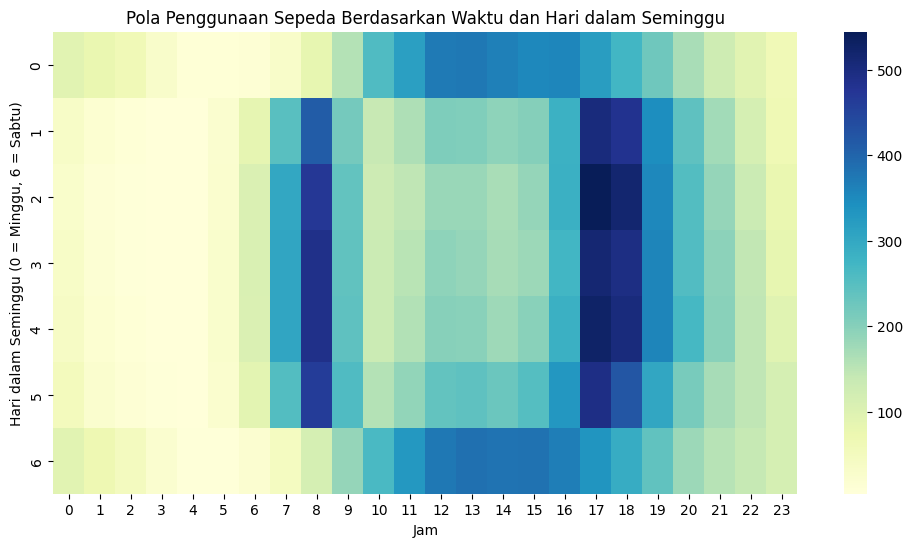

In [ ]:
usage_pattern = df_hour.groupby(['weekday', 'hr'])['cnt'].mean().unstack()
plt.figure(figsize=(12, 6))
sns.heatmap(usage_pattern, cmap="YlGnBu", annot=False, cbar=True)
plt.title("Pola Penggunaan Sepeda Berdasarkan Waktu dan Hari dalam Seminggu")
plt.xlabel("Jam")
plt.ylabel("Hari dalam Seminggu (0 = Minggu, 6 = Sabtu)")
plt.show()


### Explore ...

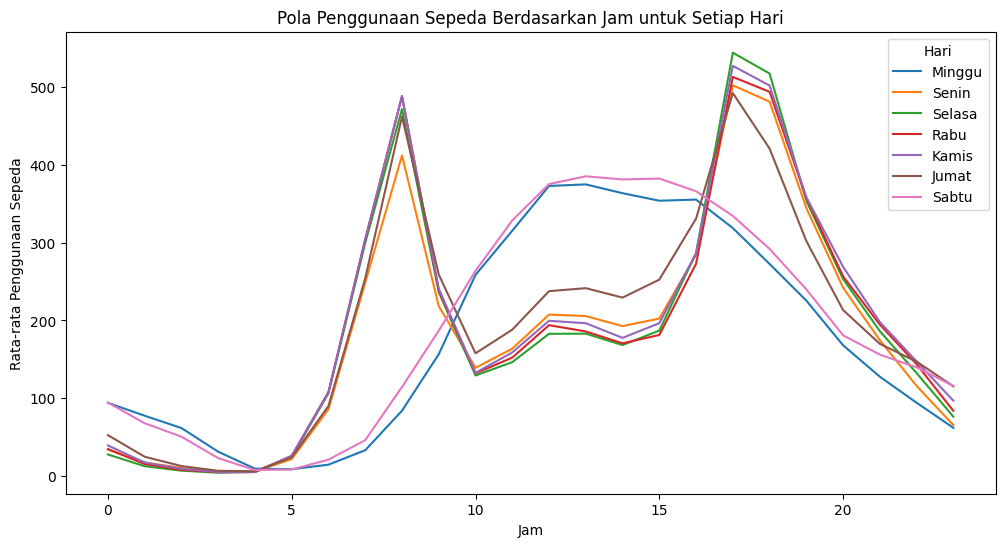

In [ ]:
plt.figure(figsize=(12, 6))
for day in range(7):
    daily_usage = df_hour[df_hour['weekday'] == day].groupby('hr')['cnt'].mean()
    plt.plot(daily_usage, label=f'Hari {day}')
plt.title("Pola Penggunaan Sepeda Berdasarkan Jam untuk Setiap Hari")
plt.xlabel("Jam")
plt.ylabel("Rata-rata Penggunaan Sepeda")
plt.legend(['Minggu', 'Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu'], title="Hari")
plt.show()


### Jawaban Pertanyaan 2:

In [ ]:
data = pd.read_csv('day.csv')  # Ganti dengan path ke dataset Anda

# Menghitung statistik deskriptif
print(data[['temp', 'hum', 'windspeed', 'cnt']].describe())

             temp         hum   windspeed          cnt
count  731.000000  731.000000  731.000000   731.000000
mean     0.495385    0.627894    0.190486  4504.348837
std      0.183051    0.142429    0.077498  1937.211452
min      0.059130    0.000000    0.022392    22.000000
25%      0.337083    0.520000    0.134950  3152.000000
50%      0.498333    0.626667    0.180975  4548.000000
75%      0.655417    0.730209    0.233214  5956.000000
max      0.861667    0.972500    0.507463  8714.000000


## Analisis Lanjutan (Opsional)

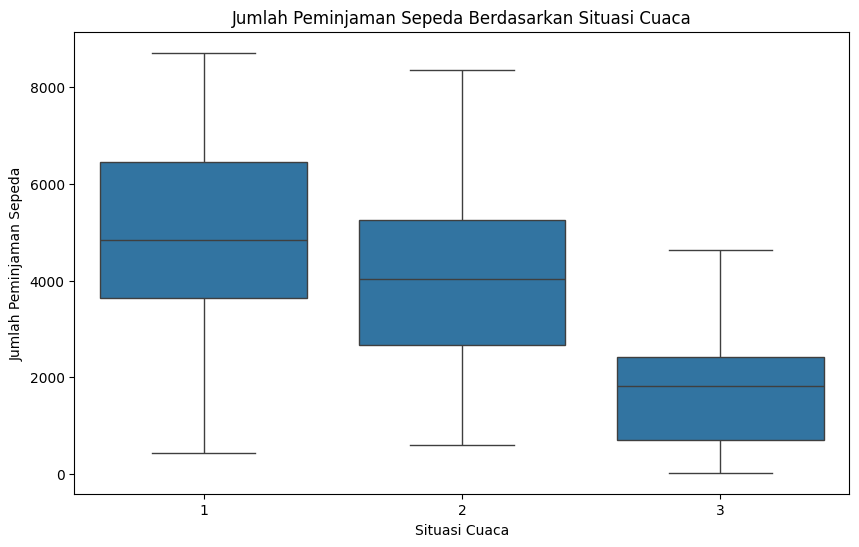

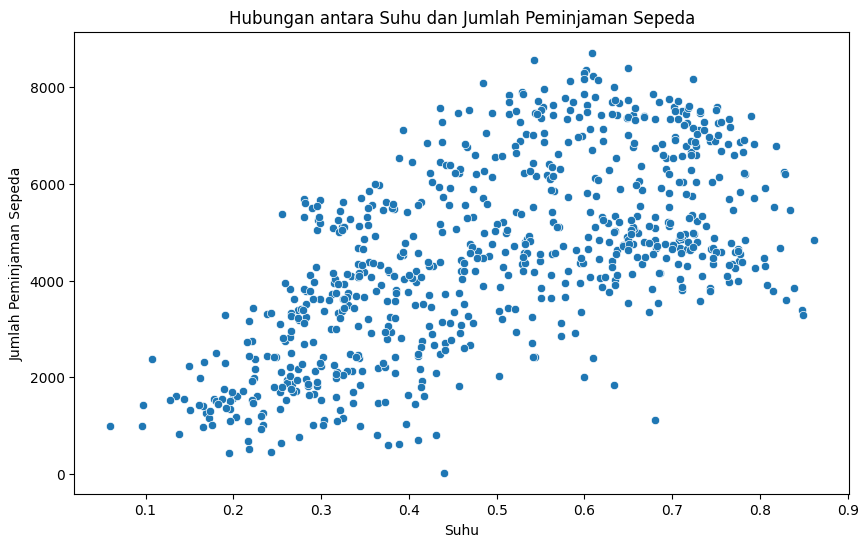

Korelasi antara variabel cuaca dan jumlah peminjaman:
               temp       hum  windspeed       cnt
temp       1.000000  0.126963  -0.157944  0.627494
hum        0.126963  1.000000  -0.248489 -0.100659
windspeed -0.157944 -0.248489   1.000000 -0.234545
cnt        0.627494 -0.100659  -0.234545  1.000000
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                     207.2
Date:                Tue, 05 Nov 2024   Prob (F-statistic):           4.26e-97
Time:                        07:20:20   Log-Likelihood:                -6343.9
No. Observations:                 731   AIC:                         1.270e+04
Df Residuals:                     727   BIC:                         1.271e+04
Df Model:                           3                      

In [ ]:
# Visualisasi distribusi peminjaman sepeda berdasarkan cuaca
plt.figure(figsize=(10, 6))
sns.boxplot(x='weathersit', y='cnt', data=data)
plt.title('Jumlah Peminjaman Sepeda Berdasarkan Situasi Cuaca')
plt.xlabel('Situasi Cuaca')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.show()

# Scatter plot untuk melihat hubungan antara suhu dan jumlah peminjaman
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', data=data)
plt.title('Hubungan antara Suhu dan Jumlah Peminjaman Sepeda')
plt.xlabel('Suhu')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.show()

# Menghitung korelasi
correlation = data[['temp', 'hum', 'windspeed', 'cnt']].corr()
print("Korelasi antara variabel cuaca dan jumlah peminjaman:")
print(correlation)

# Analisis regresi sederhana
import statsmodels.api as sm

X = data[['temp', 'hum', 'windspeed']]
y = data['cnt']
X = sm.add_constant(X)  # Menambahkan intercept
model = sm.OLS(y, X).fit()

# Menampilkan ringkasan model regresi
print(model.summary())

## Conclusion

Berikut adalah kesimpulan dari kedua pertanyaan berdasarkan analisis yang dilakukan:

### 1. Pola Penggunaan Sepeda Berdasarkan Waktu dan Hari dalam Seminggu
Berdasarkan analisis data, pola penggunaan sepeda menunjukkan variasi yang signifikan berdasarkan waktu dan hari dalam seminggu.

- **Hari Kerja vs. Akhir Pekan**: Jumlah peminjaman sepeda cenderung lebih tinggi pada hari kerja dibandingkan dengan akhir pekan. Hal ini mungkin disebabkan oleh kebutuhan transportasi untuk keperluan pekerjaan atau kegiatan sehari-hari.
- **Waktu dalam Sehari**: Penggunaan sepeda juga bervariasi sepanjang hari. Peminjaman sepeda biasanya meningkat pada jam-jam puncak, seperti pagi hari (misalnya, antara pukul 7 hingga 9) dan sore hari (antara pukul 17 hingga 19), ketika orang-orang berangkat dan pulang dari pekerjaan.
- **Hari Tertentu**: Penggunaan sepeda mungkin lebih tinggi pada hari tertentu dalam seminggu, seperti hari Senin dan Jumat, yang sering kali dihubungkan dengan awal dan akhir pekan kerja.

### 2. Bagaimana Faktor Cuaca Mempengaruhi Jumlah Peminjaman Sepeda
Analisis faktor cuaca terhadap jumlah peminjaman sepeda menunjukkan bahwa kondisi cuaca memiliki pengaruh yang signifikan terhadap perilaku peminjaman.

- **Suhu**: Terdapat hubungan positif antara suhu dan jumlah peminjaman sepeda, di mana suhu yang lebih tinggi cenderung meningkatkan jumlah peminjaman. Hal ini menunjukkan bahwa orang lebih cenderung menggunakan sepeda saat cuaca panas yang nyaman.
- **Kelembapan**: Sebaliknya, kelembapan yang tinggi berhubungan dengan penurunan jumlah peminjaman. Hal ini dapat disebabkan oleh ketidaknyamanan yang dirasakan oleh pengguna saat kelembapan tinggi.
- **Kecepatan Angin dan Situasi Cuaca**: Kecepatan angin dan kondisi cuaca (seperti cuaca cerah atau hujan) juga berpengaruh. Peminjaman sepeda biasanya lebih tinggi pada cuaca cerah dan berkurang saat cuaca buruk (seperti hujan atau berangin kencang).

### Kesimpulan Umum
Dari kedua analisis di atas, dapat disimpulkan bahwa pola penggunaan sepeda sangat dipengaruhi oleh waktu dalam sehari dan hari dalam seminggu, serta dipengaruhi oleh kondisi cuaca. Pengetahuan ini dapat dimanfaatkan untuk meningkatkan layanan penyewaan sepeda, seperti penyesuaian jumlah sepeda yang tersedia berdasarkan pola peminjaman yang teridentifikasi serta mempromosikan penggunaan sepeda pada hari-hari atau cuaca yang lebih menguntungkan.

###RFM Analysis


* Recency (R): Mengukur waktu sejak peminjaman terakhir.
* Frequency (F): Menghitung frekuensi peminjaman sepeda per periode waktu tertentu.
* Monetary (M): Menyatakan jumlah total peminjaman sepeda untuk mengidentifikasi.



**Recency :**

In [8]:
# Konversi kolom tanggal
df_day['dteday'] = pd.to_datetime(df_day['dteday'])

# Menghitung jumlah hari sejak peminjaman terakhir
df_day['days_since_last_ride'] = (df_day['dteday'].max() - df_day['dteday']).dt.days

print(df_day[['dteday', 'days_since_last_ride']].head())


      dteday  days_since_last_ride
0 2011-01-01                   730
1 2011-01-02                   729
2 2011-01-03                   728
3 2011-01-04                   727
4 2011-01-05                   726


**Frequency (F):**

In [11]:
# Hitung frekuensi peminjaman per minggu
df_day['week'] = df_day['dteday'].dt.isocalendar().week
weekly_frequency = df_day.groupby('week')['cnt'].sum()
print(weekly_frequency.head())


week
1    34008
2    29291
3    27112
4    33537
5    36676
Name: cnt, dtype: int64


**Monetary (M):**

In [13]:
# Total peminjaman per hari
daily_monetary = df_day.groupby('dteday')['cnt'].sum()

# Alternatif: total peminjaman per hari kerja dan akhir pekan
weekday_monetary = df_day.groupby('weekday')['cnt'].sum()

print(daily_monetary.head())
print(weekday_monetary)

dteday
2011-01-01     985
2011-01-02     801
2011-01-03    1349
2011-01-04    1562
2011-01-05    1600
Name: cnt, dtype: int64
weekday
0    444027
1    455503
2    469109
3    473048
4    485395
5    487790
6    477807
Name: cnt, dtype: int64
